In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
data = pd.read_csv('group2.csv', sep='\t')
data.head(3)

,ID,Person A,Person B,Person C,Person D,Person E,Person F,Jimena,Weird
0,1000,1.0,1,1,2,2,1,2.0,0.0
1,1001,4.0,4,3,4,1,3,3.0,0.0
2,1002,2.0,1,2,2,3,2,1.0,0.0


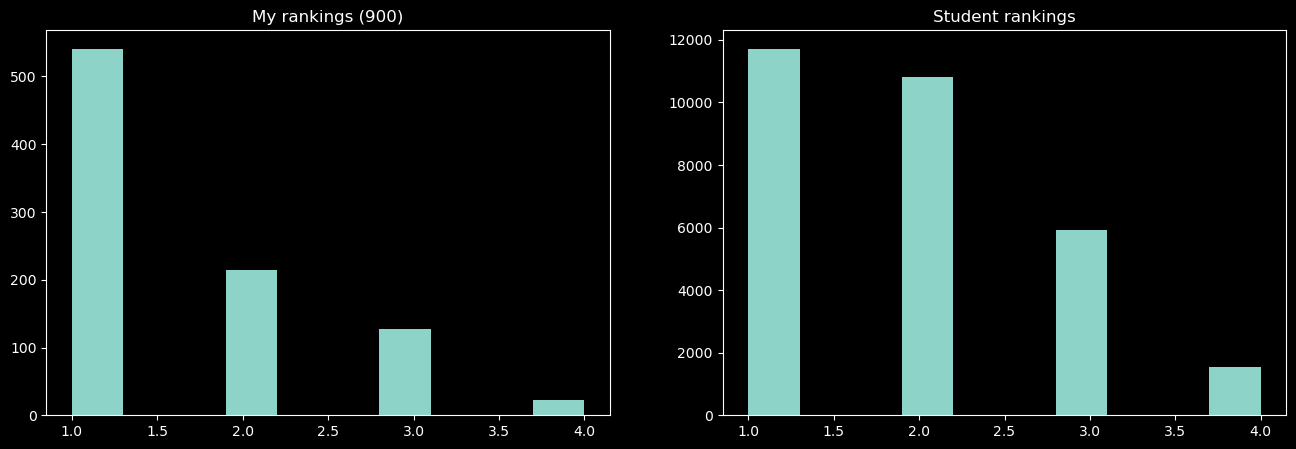

In [3]:
# Distribution of rankings
data_all = pd.DataFrame(columns = data.columns)
all_rank = pd.DataFrame()
for i in range(1, 8):
    if(i == 3): continue
    data = pd.read_csv('group' + str(i) + '.csv', sep='\t')
    data_all = pd.concat((data_all, data), axis=0)
    for name in (data.columns):
        if(len(name) < 8): continue
        all_rank = pd.concat((all_rank, data[name]), axis=0)

all_rank = all_rank.rename(mapper = {0: 'rank'}, axis=1)
all_rank = all_rank.astype({'rank': float})

plt.figure(figsize=(16,5)) 
plt.subplot(1,2,1)
plt.title('My rankings (900)')
plt.hist(data_all['Jimena'])
    
plt.subplot(1,2,2)
plt.title('Student rankings')
plt.hist(all_rank['rank'], range=(1.,4.))
    
plt.show()

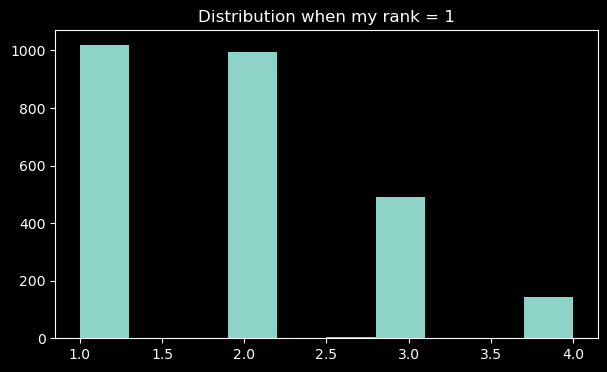

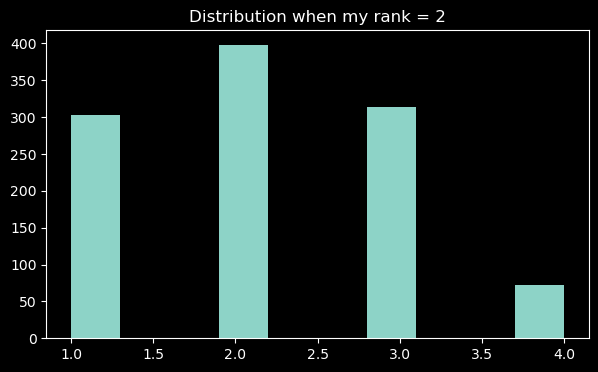

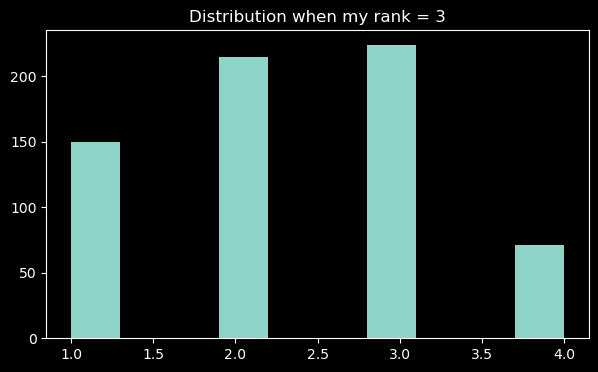

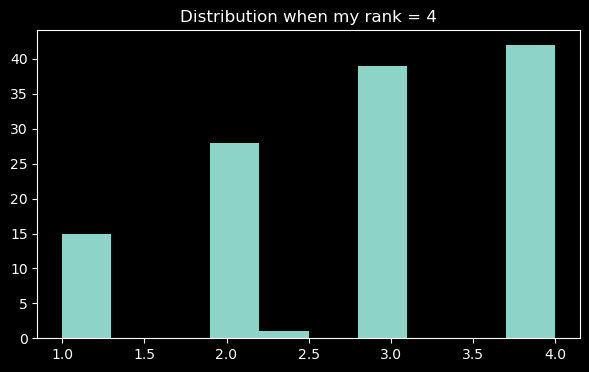

In [4]:
# Distribution for each value of my rankings
list_rank = [[], [], [], []]

for j in range(1, 5):
    for i in range(1, 8):
        if(i == 3): continue
        data = pd.read_csv('group' + str(i) + '.csv', sep='\t')
        data_tmp = data[data['Jimena'] == j]
        for name in (data.columns):
            if(len(name) < 8): continue
            list_rank[j-1] = np.concatenate((list_rank[j-1], data_tmp[name].values), axis=0)
            
    plt.figure(figsize=(7,4))
    plt.title('Distribution when my rank = ' + str(j))
    plt.hist(list_rank[j-1], range=(1,4))
    plt.show()
        

In [5]:
def distance_to_line(x, y, m=1, b=0):
    """
    Calculates the distance between a point (x,y) and a line given by the standard equation y = mx + b.
    """
    numerator = abs(m * x - y + b)
    denominator = np.sqrt(m**2 + 1)
    distance = numerator / denominator
    if(m*x > y):
        distance = -distance
    return distance

In [22]:
# calculating all classification rates & correlation
data_students = pd.DataFrame(columns = ['Group', 'Person', 'TPR', 'FPR', 'PUR', 'rho', 'Distance'])
TPR_list, TNR_list, FPR_list, PUR_list, rho_list = [], [], [], [], []
for i in range(1, 8):
    if(i == 3): continue
    data = pd.read_csv('group' + str(i) + '.csv', sep='\t')
    data = data[data['Jimena'] > 0]
    data_pos = data[data['Jimena'] >= 3]
    data_neg = data[data['Jimena'] <= 2]
    for j in range(len(data.columns)):
        name = data.columns[j]
        if(len(name) < 8): continue
        data_pur = data[data[name] >= 4]
        TPR = len(data_pos[data_pos[name] >= 3])/len(data_pos)
        TNR = len(data_neg[data_neg[name] <= 2])/len(data_neg)
        FPR = len(data_neg[data_neg[name] >= 3])/len(data_neg)
        PUR = len(data_pur[data_pur['Jimena'] >= 3])/len(data_pur)
        #print(len(data_pur), len(data_pur[data_pur['Jimena'] >= 3]))
        TPR_list.append(TPR)
        TNR_list.append(TNR)
        FPR_list.append(FPR)
        PUR_list.append(PUR) # Of the ones they gave a 4, which ones I gave a 3 or 4
        dif = list(data[name] - data['Jimena'])
        squared_dif = [number ** 2 for number in dif]
        sum_dif = sum(squared_dif)
        rho = 1 - (6*sum_dif)/(len(dif) * (len(dif)^2-1))
        rho_list.append(rho)
        dist = distance_to_line(FPR, TPR, m=1, b=0)
        row = {'Group': i, 'Person': j, 'TPR': TPR, 'FPR': FPR, 'PUR': PUR, 'rho': rho, 'Distance': dist}
        data_students = data_students.append(row, ignore_index = True)
        
my_types = {'Group': int, 'Person': int, 'TPR': float, 'FPR': float, 'PUR': float, 'rho': float, 'Distance': float}
data_students = data_students.astype(my_types)
data_students.to_csv('data_students.csv', index=False)

30


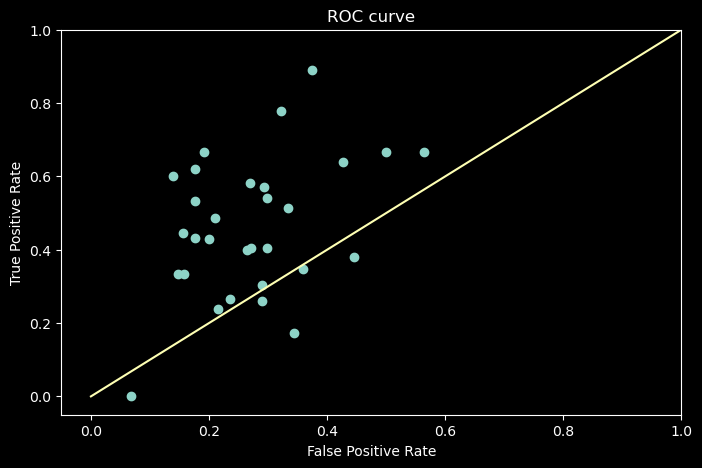

In [23]:
guessing = np.linspace(0, 1 , 100)
print(len(FPR_list))

plt.figure(figsize=(8,5))
plt.title('ROC curve')
plt.xlim(-0.05, 1)
plt.ylim(-0.05, 1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(data_students['FPR'], data_students['TPR'], 'o')
plt.plot(guessing, guessing)
plt.show()


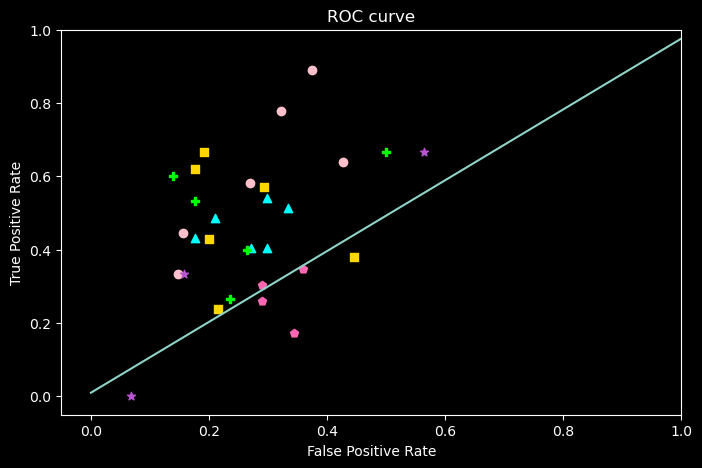

In [27]:
plt.figure(figsize=(8,5))
plt.title('ROC curve')
plt.xlim(-0.05, 1)
plt.ylim(-0.05, 1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

color_list = ['Lavender', 'Peach', 'Lilac', 'Lilac', 'Baby Pink', 'Mint Green', 'Sky Blue']
#color_list = ['Rose Quartz', 'Seafoam Green', 'Periwinkle', 'Buttercream', 'Cotton Candy', 'Coral', 'Spearmint']
#color_list = ["Electric Blue", "Lime Green", "Coral Pink", "Coral Pink", "Goldenrod", "Amethyst Purple", "Teal"]
color_list = ['#FFC0CB', '#00FFFF', '#FFD700', '#FFD700', '#FF69B4', '#00FF00', '#BA55D3']
marker_list = ['o', "^", "s", "s", "p", "P", "*", "D"]
for i in range(len(data_students)):
    #print(data_students['Group'].iloc[i])
    #print(type(data_students['Group'].iloc[i] -1 ))
    #print(data_students['Group'].iloc[i])
    col_name = color_list[data_students['Group'].iloc[i]-1]
    mar_name = marker_list[data_students['Group'].iloc[i]-1]
    #print(mar_name, col_name)
    #print(data_students['FPR'].iloc[i], data_students['TPR'].iloc[i])
    plt.scatter(data_students['FPR'].iloc[i], data_students['TPR'].iloc[i], marker=mar_name, color=col_name)
    
#plt.plot(guessing, guessing)
plt.plot(guessing, 0.966*guessing+0.01)
plt.show()


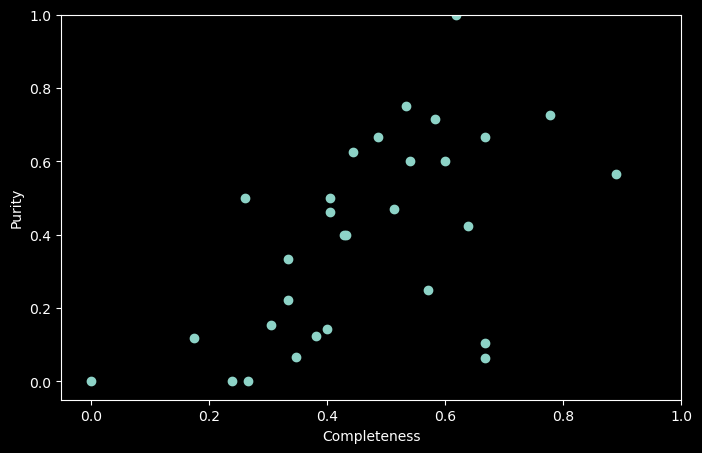

In [10]:
plt.figure(figsize=(8,5))
plt.xlim(-0.05, 1)
plt.ylim(-0.05, 1)
plt.xlabel('Completeness')
plt.ylabel('Purity')
plt.plot(TPR_list, PUR_list, 'o')
plt.show()

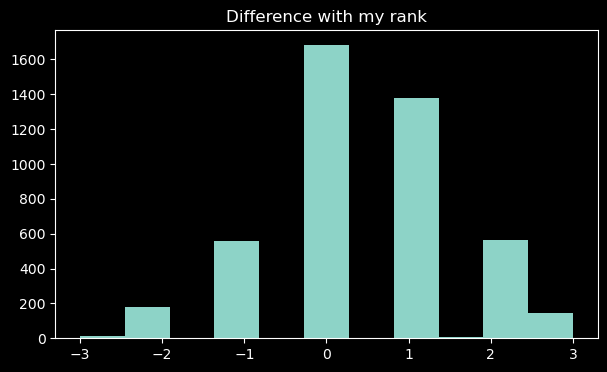

In [11]:
# Difference between their rankings & mine
from collections import Counter
all_dif = []

for i in range(1, 8):
    if(i == 3): continue
    data = pd.read_csv('group' + str(i) + '.csv', sep='\t')
    data = data[data['Jimena'] > 0]
    for name in (data.columns):
        if(len(name) < 8): continue
        dif = data[name] - data['Jimena']
        all_dif = np.concatenate((all_dif, list(dif)) )
        
counted = Counter(all_dif)
plt.figure(figsize=(7,4))
plt.title('Difference with my rank')
plt.hist(all_dif, bins=len(counted))
plt.show()

30


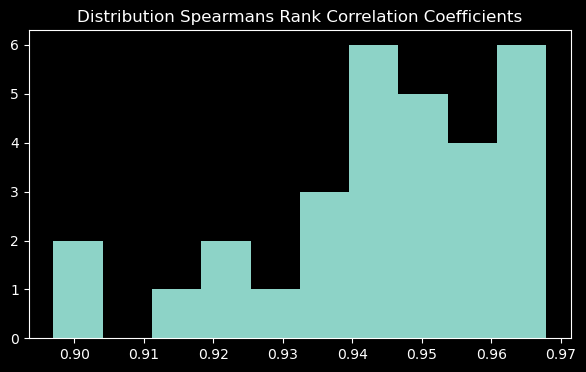

In [12]:
# Correlation with respect to me: Spearman's Rank correlation coefficient
rho_list = []

for i in range(1, 8):
    if(i == 3): continue
    data = pd.read_csv('group' + str(i) + '.csv', sep='\t')
    data = data[data['Jimena'] > 0]
    for name in (data.columns):
        if(len(name) < 8): continue
        dif = list(data[name] - data['Jimena'])
        squared_dif = [number ** 2 for number in dif]
        sum_dif = sum(squared_dif)
        rho = 1 - (6*sum_dif)/(len(dif) * (len(dif)^2-1))
        #print(rho)
        rho_list.append(rho)
        #all_dif = np.concatenate((all_dif, list(dif)) )
    

print(len(rho_list))
    
plt.figure(figsize=(7,4))
plt.title('Distribution Spearmans Rank Correlation Coefficients')
plt.hist(rho_list)
plt.show()

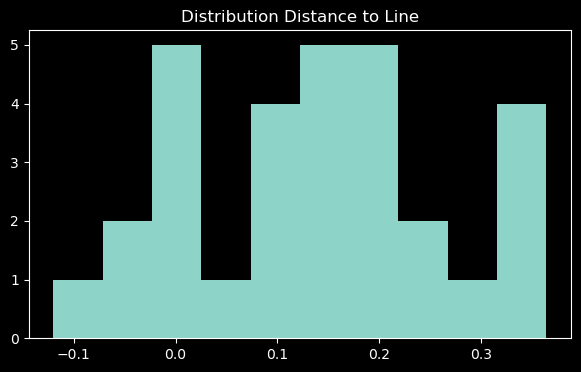

In [13]:
plt.figure(figsize=(7,4))
plt.title('Distribution Distance to Line')
plt.hist(data_students['Distance'])
plt.show()

In [14]:
data_students

,Group,Person,TPR,FPR,PUR,rho,Distance
0,1,1,0.777778,0.321739,0.727273,0.952848,0.322468
1,1,2,0.583333,0.269565,0.714286,0.954702,0.221868
2,1,3,0.638889,0.426087,0.423077,0.931656,0.150474
3,1,4,0.888889,0.373913,0.565217,0.945430,0.364143
4,1,5,0.333333,0.147826,0.222222,0.950993,0.131173
5,1,6,0.444444,0.156522,0.625000,0.951258,0.203592
6,2,1,0.405405,0.271930,0.461538,0.943311,0.094381
7,2,2,0.513514,0.333333,0.470588,0.937748,0.127407
8,2,3,0.432432,0.175439,0.400000,0.952848,0.181722
9,2,4,0.405405,0.298246,0.500000,0.940927,0.075773
